# 목표 - 데이터 전처리
- 데이터 불러오기
## 데이터 탐색
    - boxplot
    - 정규성
    - t검정 평균이 차이나는지
    - F검정 분산이 차이나는지
    - VIF와 공분산성 확인 ∵다중공선성 문제
## 데이터 전처리
- minmaxscale
- standardscale
- robustscale
- log변환
## 데이터 재탐색
    - 공분산 hitmap
    - VIF 확인
    - 정규성 검증
    - t검정

# for 데이터 전처리

In [149]:
import os
current_directory = os.getcwd() # 현재 작업 디렉토리를 얻기
print("현재 작업 디렉토리:", current_directory)

현재 작업 디렉토리: c:\Users\jay_hook\myhub\miniproj


In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import platform
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지 제거
import warnings
warnings.filterwarnings('ignore')

- 데이터 불러오기

In [151]:
df = pd.read_csv(current_directory+'/monthly_data.csv', index_col=0)

## EDA 데이터 탐색 

In [152]:
df

,시점,KRW/USD,경제심리지수(원계열),뉴스심리지수,소비자심리지수,원자재구입가격실적,수출실적,원자재구입가격전망,수출전망,"M2(말잔, 원계열)",...,USBIR,KOBIR,KOTN,USTN,KORIBOR,USRIBOR,달러결제수출금액,달러결제수입금액,달러결제수출비율,달러결제수입비율
0,200807,1089.0,93.6,79.55,74.6,159,121,154,116,1375993.6,...,2.000,5.00,6.030,3.946,5.66,2.79125,35024.4,35797.2,85.5,83.3
1,200808,1207.0,101.8,75.88,92.4,130,111,123,110,1394030.4,...,2.000,5.25,5.910,3.812,5.79,2.81063,31685.4,33315.4,86.5,82.4
2,200809,1291.0,97.8,70.51,91.2,128,103,123,106,1392431.9,...,2.000,5.25,5.990,3.823,5.82,4.05250,32363.8,32790.9,86.5,83.0
3,200810,1469.0,82.5,60.04,78.9,124,102,121,99,1411370.4,...,1.000,4.25,5.530,3.964,5.87,3.02625,31572.6,29797.5,85.1,82.5
4,200811,1259.5,71.2,65.53,74.1,109,83,107,74,1427905.3,...,1.000,4.00,5.730,2.920,5.43,2.21688,24279.5,23863.6,84.2,82.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,202208,1430.2,99.3,97.92,89.0,132,105,133,104,3737384.8,...,2.375,2.50,3.322,3.193,2.87,3.09971,48689.5,55181.8,86.0,83.6
170,202209,1424.3,98.0,86.14,91.6,127,98,128,93,3747840.6,...,3.125,2.50,3.897,3.829,3.18,3.75471,48955.1,51457.7,85.6,84.3
171,202210,1318.8,95.4,80.15,89.0,120,87,120,90,3769959.8,...,3.125,3.00,4.267,4.048,3.89,4.46029,44748.6,49349.4,85.4,83.4
172,202211,1264.5,91.2,88.53,86.7,121,93,121,89,3798048.0,...,3.875,3.25,3.915,3.605,4.08,4.77857,43660.8,48129.0,84.3,81.8


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, 0 to 173
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   시점           174 non-null    int64  
 1   KRW/USD      174 non-null    float64
 2   경제심리지수(원계열)  174 non-null    float64
 3   뉴스심리지수       174 non-null    float64
 4   소비자심리지수      174 non-null    float64
 5   원자재구입가격실적    174 non-null    int64  
 6   수출실적         174 non-null    int64  
 7   원자재구입가격전망    174 non-null    int64  
 8   수출전망         174 non-null    int64  
 9   M2(말잔, 원계열)  174 non-null    float64
 10  미국M2         174 non-null    float64
 11  USBIR        174 non-null    float64
 12  KOBIR        174 non-null    float64
 13  KOTN         174 non-null    float64
 14  USTN         174 non-null    float64
 15  KORIBOR      174 non-null    float64
 16  USRIBOR      174 non-null    float64
 17  달러결제수출금액     174 non-null    float64
 18  달러결제수입금액     174 non-null    float64
 19  달러결제수출비율     

In [154]:
df.describe()

,시점,KRW/USD,경제심리지수(원계열),뉴스심리지수,소비자심리지수,원자재구입가격실적,수출실적,원자재구입가격전망,수출전망,"M2(말잔, 원계열)",...,USBIR,KOBIR,KOTN,USTN,KORIBOR,USRIBOR,달러결제수출금액,달러결제수입금액,달러결제수출비율,달러결제수입비율
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,1.740000e+02,...,174.00000,174.00000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,201530.741379,1154.221264,97.956897,99.775287,101.382759,113.114943,94.522989,112.683908,96.149425,2.339397e+06,...,0.64296,1.95546,3.059333,2.336885,2.217586,0.964631,38331.045977,33781.013793,84.909195,81.247126
std,420.119879,81.861555,10.130560,10.435549,9.473916,13.168473,15.545832,12.329207,15.315585,6.788562e+05,...,0.86422,0.91934,1.238974,0.788058,1.043861,1.011979,6097.071391,7047.488641,1.100723,2.299778
min,200807.000000,1011.800000,61.200000,60.040000,69.200000,90.000000,51.000000,91.000000,49.000000,1.375994e+06,...,0.12500,0.50000,1.254000,0.528000,0.580000,0.117750,17886.200000,17905.900000,82.300000,76.300000
25%,201202.250000,1108.625000,94.525000,94.717500,98.125000,103.250000,85.000000,104.000000,87.250000,1.759657e+06,...,0.12500,1.25000,2.091750,1.776250,1.510000,0.262825,35327.575000,29531.400000,84.200000,79.300000
50%,201509.500000,1136.500000,97.800000,101.020000,102.200000,109.500000,92.000000,109.000000,94.000000,2.230001e+06,...,0.12500,1.75000,2.763000,2.336500,1.980000,0.457175,39065.050000,34301.500000,85.050000,81.500000
75%,201904.750000,1187.875000,103.600000,106.130000,107.100000,120.000000,103.750000,119.750000,105.000000,2.770705e+06,...,1.00000,2.50000,3.847500,2.860000,2.785000,1.369630,41657.050000,36757.875000,85.700000,82.900000
max,202212.000000,1534.000000,116.500000,119.420000,122.100000,159.000000,132.000000,154.000000,131.000000,3.798048e+06,...,4.37500,5.25000,6.030000,4.048000,5.870000,4.778570,54293.600000,55347.900000,87.000000,87.000000


In [155]:
Mdate = df['시점']
y = df['KRW/USD']
X = df.drop(['시점', 'KRW/USD'], axis=1)

- boxplot

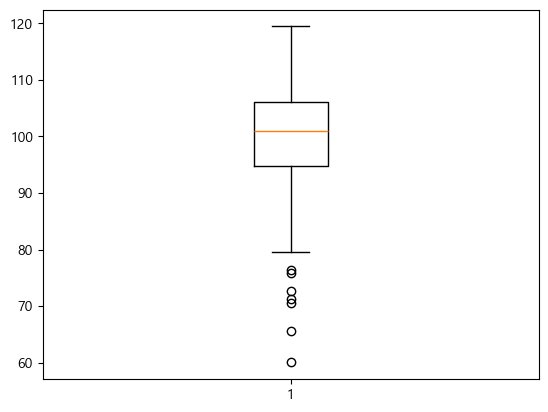

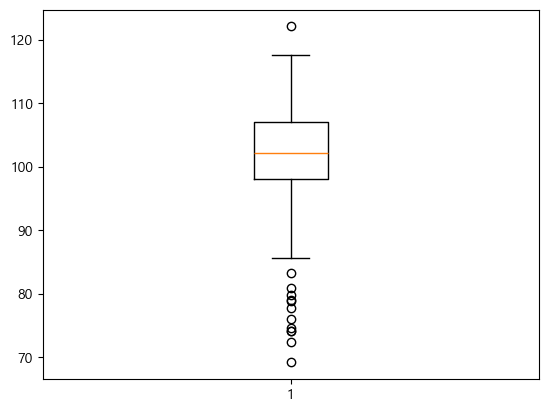

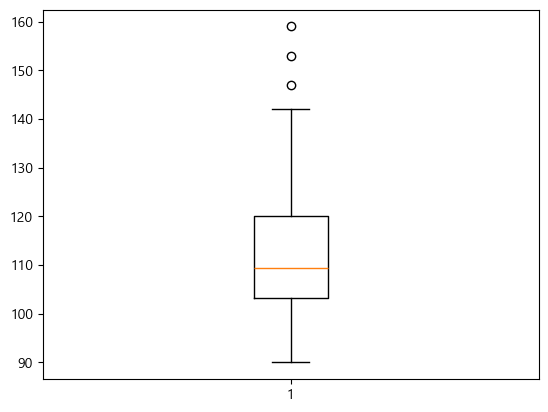

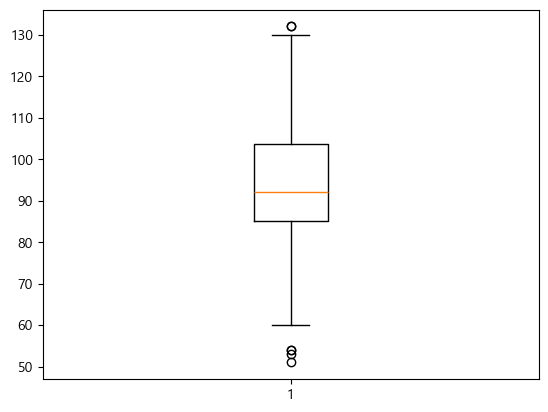

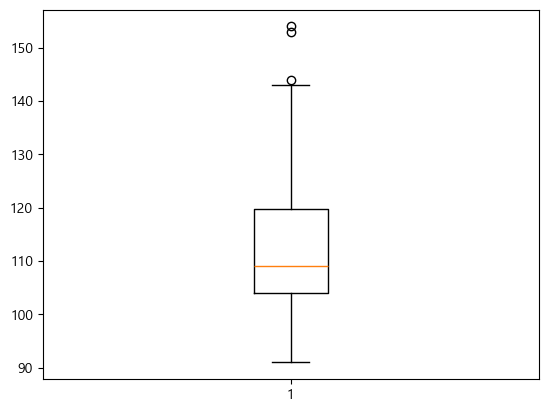

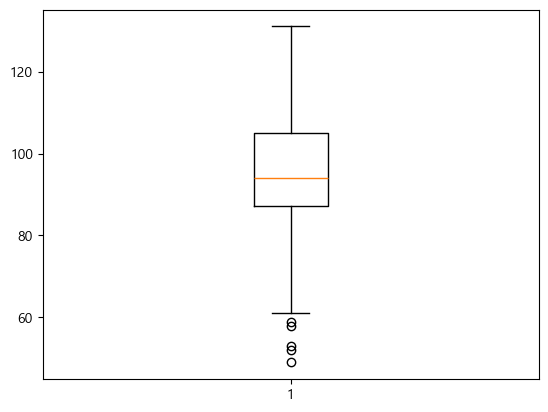

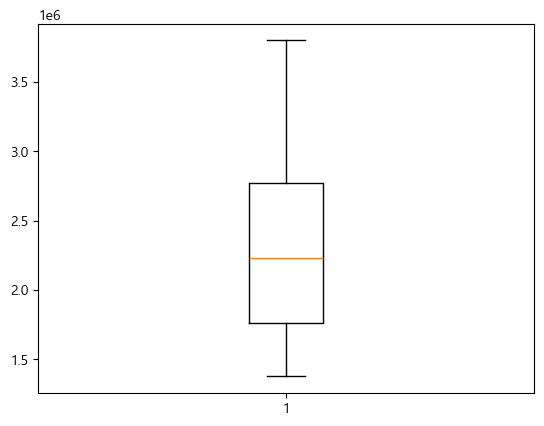

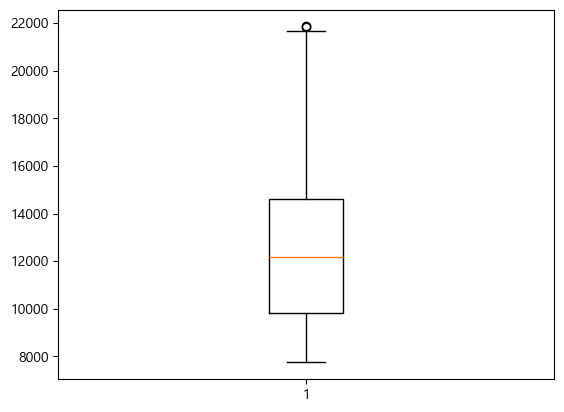

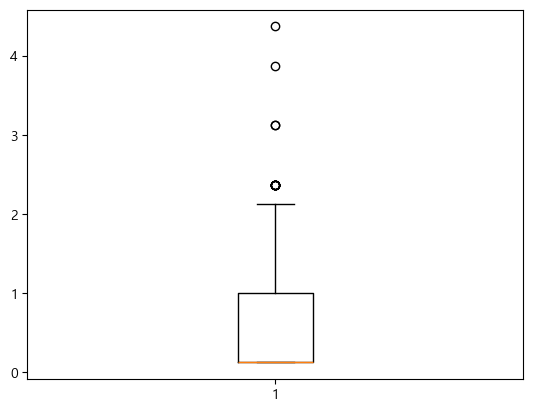

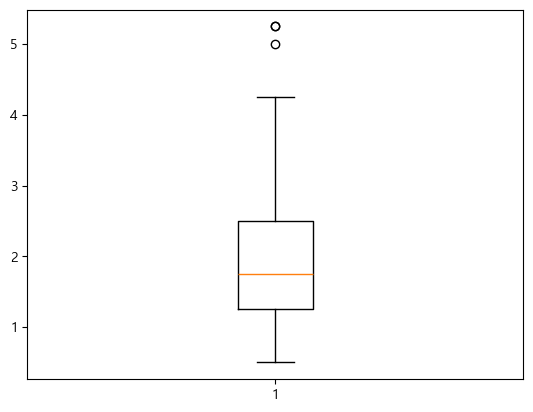

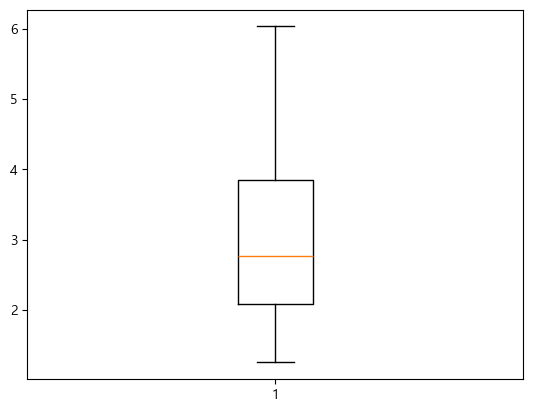

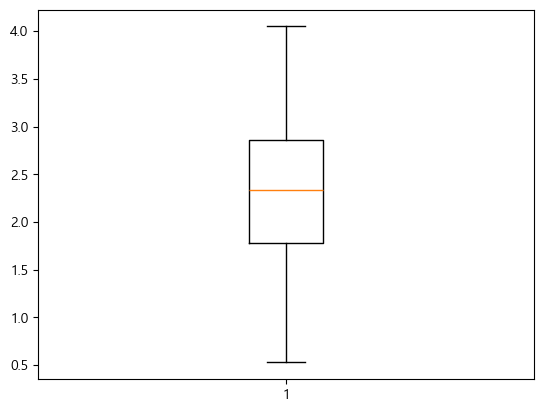

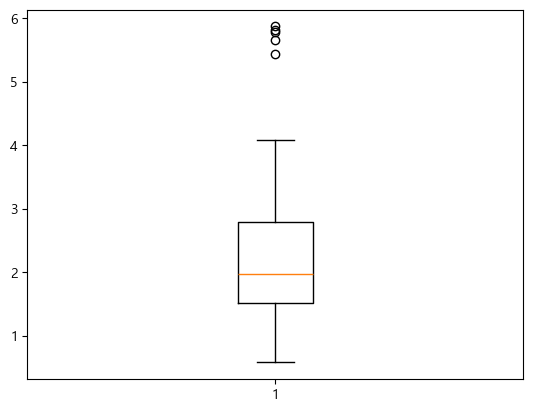

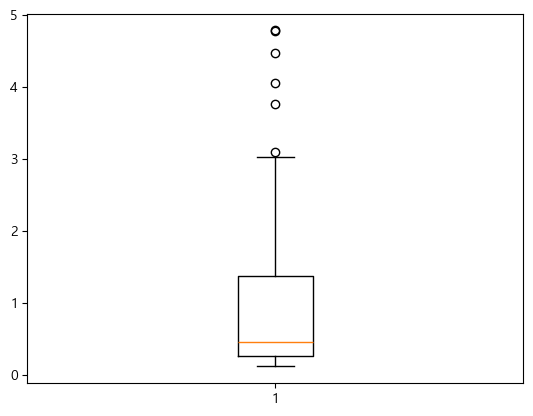

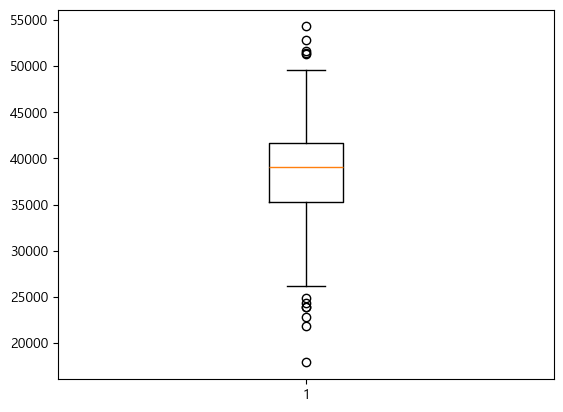

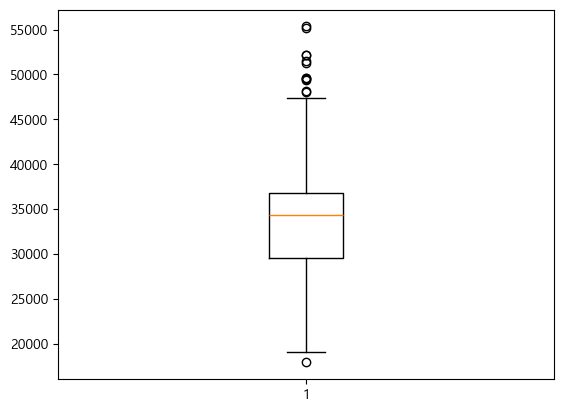

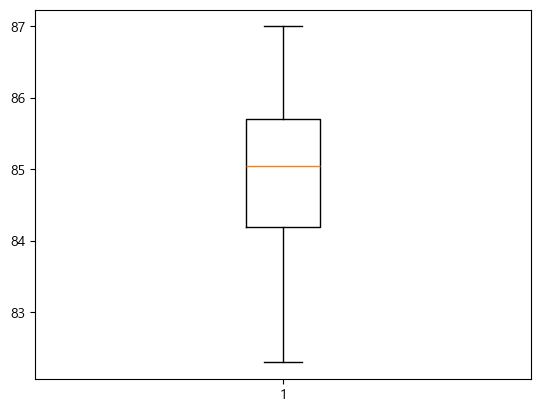

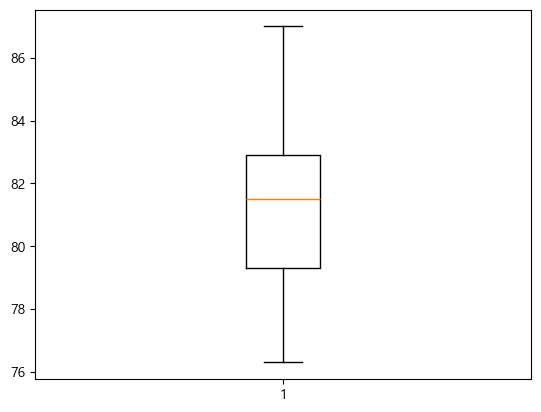

In [156]:
for i in X.columns[1:]:
    plt.boxplot(X[i])
    plt.show()

- 정규성 검정

In [157]:
from scipy import stats
for i in range(len(X.columns)):
    a = X[X.columns[i]]
    print(X.columns[i], len(a))
    statistic, p_value1 = stats.shapiro(a)
    alpha = 0.05  # 유의수준 설정 (일반적으로 0.05 사용)
    if p_value1 < alpha:
        print('shapiro p_value:', p_value1, "데이터는 정규 분포를 따르지 않습니다.")
    else:
        print('shapiro p_value:', p_value1, "데이터는 정규 분포를 따를 가능성이 있습니다.")
    
    statistic, p_value2 = stats.normaltest(a)
    if p_value2 < alpha:
        print('normaltest p_value:', p_value2, "데이터는 정규 분포를 따르지 않습니다.")
    else:
        print('normaltest p_value:', p_value2, "데이터는 정규 분포를 따를 가능성이 있습니다.")

경제심리지수(원계열) 174
shapiro p_value: 4.230492067769376e-10 데이터는 정규 분포를 따르지 않습니다.
normaltest p_value: 3.2820966405202635e-11 데이터는 정규 분포를 따르지 않습니다.
뉴스심리지수 174
shapiro p_value: 2.1100271624163724e-05 데이터는 정규 분포를 따르지 않습니다.
normaltest p_value: 1.5069755007370836e-06 데이터는 정규 분포를 따르지 않습니다.
소비자심리지수 174
shapiro p_value: 1.2438839291917247e-07 데이터는 정규 분포를 따르지 않습니다.
normaltest p_value: 7.761555485901035e-08 데이터는 정규 분포를 따르지 않습니다.
원자재구입가격실적 174
shapiro p_value: 5.984512085888127e-07 데이터는 정규 분포를 따르지 않습니다.
normaltest p_value: 1.778936384020232e-05 데이터는 정규 분포를 따르지 않습니다.
수출실적 174
shapiro p_value: 0.0009709767764434218 데이터는 정규 분포를 따르지 않습니다.
normaltest p_value: 0.39572000664348644 데이터는 정규 분포를 따를 가능성이 있습니다.
원자재구입가격전망 174
shapiro p_value: 4.6981856627326124e-08 데이터는 정규 분포를 따르지 않습니다.
normaltest p_value: 1.5107724564357837e-06 데이터는 정규 분포를 따르지 않습니다.
수출전망 174
shapiro p_value: 0.0008602145244367421 데이터는 정규 분포를 따르지 않습니다.
normaltest p_value: 0.18596439523678476 데이터는 정규 분포를 따를 가능성이 있습니다.
M2(말잔, 원계열) 174
shapiro p_valu

- VIF 확인

In [158]:
!pip install statsmodels

In [159]:
# VIF확인하기
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

       Features          VIF
0   경제심리지수(원계열)  1881.550594
1        뉴스심리지수   391.704255
2       소비자심리지수  1020.315928
3     원자재구입가격실적  3884.825170
4          수출실적  1184.326298
5     원자재구입가격전망  4307.487148
6          수출전망  1413.601983
7   M2(말잔, 원계열)  5159.008284
8          미국M2  3150.683261
9         USBIR    39.121934
10        KOBIR   468.148387
11         KOTN   146.183178
12         USTN    77.726239
13      KORIBOR   446.318983
14      USRIBOR    50.556443
15     달러결제수출금액   586.259270
16     달러결제수입금액   770.906853
17     달러결제수출비율  7979.386517
18     달러결제수입비율  6514.646744


- 공분산 확인

<Axes: >

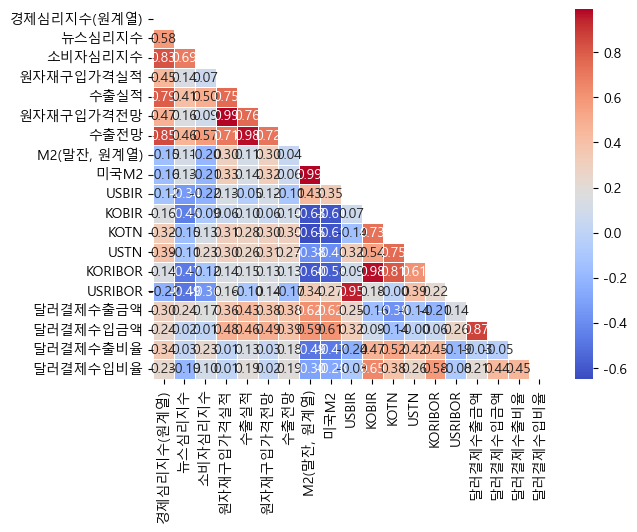

In [160]:
# 상관계수 표
corr_data = X[X.columns].corr()
mask = np.triu(np.ones_like(corr_data, dtype=bool))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', mask=mask)

## 데이터 전처리

In [161]:
# 실적과 전망 중 실적이 객관적이므로 전망을 drop
X.drop(['수출전망', '원자재구입가격전망'], axis=1, inplace=True)

In [162]:
# 수출을 달러로 결제하면 결제대금을 달러로 받고 원화로 바꾸려하니 원/달러 환율에는 음의 영향으로 예상
# 반대로 달러결제 수입은 결제대금을 달러로 지급해야 해서 원화를 달러로 바꾸려 하니 원/달러 환율에는 양의 영향의로 예상
# so 달러결제수입금액 - 달러결제수출금액

In [163]:
X['달러결제순수입액'] = X['달러결제수입금액'] - X['달러결제수출금액']
X.drop(['달러결제수입금액', '달러결제수출금액'], axis=1, inplace=True)

In [164]:
# 한국M2를 미국M2로 나눠 환율과 단위 일치
X['KO/US M2'] = X['M2(말잔, 원계열)'] / X['미국M2']
X.drop(['M2(말잔, 원계열)', '미국M2'], axis=1, inplace=True)

In [165]:
# RIBOR금리 런던에서 담합이 있었으므로 제거
# 미국금리가 원/달러 환율에 양의 영향이 예상
X['BIRDIFF'] = X['USBIR'] - X['KOBIR']
X['TNDIFF'] = X['USTN'] - X['KOTN']
X.drop(['USBIR', 'KOBIR', 'USRIBOR', 'KORIBOR', 'KOTN', 'USTN'], axis=1, inplace=True)

In [166]:
X.iloc[:,:3] = (X.iloc[:,:3] - 100) / 10
# StandardSacaler된 셈이다

In [167]:
X.iloc[:,3:5] = (X.iloc[:,3:5] - 100 ) / 100
# StandardSacaler는 아니지만 StandardSacaler된 셈이다

In [168]:
X.iloc[:,5:7] = X.iloc[:,5:7] / 100
# MinmaxScaler된 셈이다

In [169]:
X

,경제심리지수(원계열),뉴스심리지수,소비자심리지수,원자재구입가격실적,수출실적,달러결제수출비율,달러결제수입비율,달러결제순수입액,KO/US M2,BIRDIFF,TNDIFF
0,-0.64,-2.045,-2.54,0.59,0.21,0.855,0.833,772.8,177.662182,-3.000,-2.084
1,0.18,-2.412,-0.76,0.30,0.11,0.865,0.824,1630.0,180.044481,-3.250,-2.098
2,-0.22,-2.949,-0.88,0.28,0.03,0.865,0.830,427.1,178.160589,-3.250,-2.167
3,-1.75,-3.996,-2.11,0.24,0.02,0.851,0.825,-1775.1,178.156095,-3.250,-1.566
4,-2.88,-3.447,-2.59,0.09,-0.17,0.842,0.827,-415.9,178.209710,-3.000,-2.810
...,...,...,...,...,...,...,...,...,...,...,...
169,-0.07,-0.208,-1.10,0.32,0.05,0.860,0.836,6492.3,173.406803,-0.125,-0.129
170,-0.20,-1.386,-0.84,0.27,-0.02,0.856,0.843,2502.6,174.518661,0.625,-0.068
171,-0.46,-1.985,-1.10,0.20,-0.13,0.854,0.834,4600.8,176.261890,0.125,-0.219
172,-0.88,-1.147,-1.33,0.21,-0.07,0.843,0.818,4468.2,177.473073,0.625,-0.310


## 데이터 재탐색

- 공분산 hitmap

<Axes: >

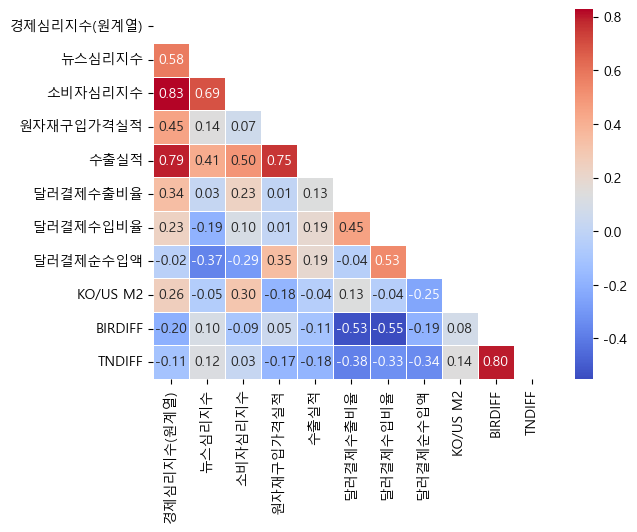

In [170]:
# 상관계수 표
corr_data = X[X.columns].corr()
mask = np.triu(np.ones_like(corr_data, dtype=bool))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', mask=mask)

- VIF 확인

In [171]:
# VIF확인하기
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

       Features          VIF
0   경제심리지수(원계열)    12.864509
1        뉴스심리지수     2.790044
2       소비자심리지수     7.536658
3     원자재구입가격실적     8.481651
4          수출실적     7.698169
5      달러결제수출비율  5521.612024
6      달러결제수입비율  4524.578504
7      달러결제순수입액     9.587526
8      KO/US M2  1103.654494
9       BIRDIFF    13.488371
10       TNDIFF     8.868003


- 정규성 검증

In [172]:
for i in range(len(X.columns)):
    a = X[X.columns[i]]
    print(X.columns[i], len(a))
    statistic, p_value1 = stats.shapiro(a)
    alpha = 0.05  # 유의수준 설정 (일반적으로 0.05 사용)
    if p_value1 < alpha:
        print('shapiro p_value:', p_value1, "데이터는 정규 분포를 따르지 않습니다.")
    else:
        print('shapiro p_value:', p_value1, "데이터는 정규 분포를 따를 가능성이 있습니다.")
    
    statistic, p_value2 = stats.normaltest(a)
    if p_value2 < alpha:
        print('normaltest p_value:', p_value2, "데이터는 정규 분포를 따르지 않습니다.")
    else:
        print('normaltest p_value:', p_value2, "데이터는 정규 분포를 따를 가능성이 있습니다.")

경제심리지수(원계열) 174
shapiro p_value: 4.2303904823626226e-10 데이터는 정규 분포를 따르지 않습니다.
normaltest p_value: 3.282096640520323e-11 데이터는 정규 분포를 따르지 않습니다.
뉴스심리지수 174
shapiro p_value: 2.1099403966218233e-05 데이터는 정규 분포를 따르지 않습니다.
normaltest p_value: 1.5069755007369646e-06 데이터는 정규 분포를 따르지 않습니다.
소비자심리지수 174
shapiro p_value: 1.2439220142823615e-07 데이터는 정규 분포를 따르지 않습니다.
normaltest p_value: 7.761555485900233e-08 데이터는 정규 분포를 따르지 않습니다.
원자재구입가격실적 174
shapiro p_value: 5.98431086018536e-07 데이터는 정규 분포를 따르지 않습니다.
normaltest p_value: 1.7789363840203153e-05 데이터는 정규 분포를 따르지 않습니다.
수출실적 174
shapiro p_value: 0.0009709767764434218 데이터는 정규 분포를 따르지 않습니다.
normaltest p_value: 0.3957200066434867 데이터는 정규 분포를 따를 가능성이 있습니다.
달러결제수출비율 174
shapiro p_value: 0.036085229367017746 데이터는 정규 분포를 따르지 않습니다.
normaltest p_value: 0.09324833303583036 데이터는 정규 분포를 따를 가능성이 있습니다.
달러결제수입비율 174
shapiro p_value: 0.011767548508942127 데이터는 정규 분포를 따르지 않습니다.
normaltest p_value: 0.0012884030278212991 데이터는 정규 분포를 따르지 않습니다.
달러결제순수입액 174
shapiro p_value: 0.

- 병합해서 to_csv scaled_data

In [175]:
filename = 'scaled_data.csv'
X.to_csv(current_directory+'/'+filename)